# Lasso Regression 

In [112]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
%matplotlib inline

In [113]:
# Preparing data
boston = load_boston()
data = pd.DataFrame(data=boston.data,columns=boston.feature_names)
data["target"]=boston.target

In [114]:
# Converting Df into array
X=data.drop('target',axis=1).values
y=data.target.values

In [115]:
# splitting the data 
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1)

In [116]:
# Standardising the data

from sklearn.preprocessing import StandardScaler
SC=StandardScaler()
X_train=SC.fit_transform(X_train)
X_test=SC.fit_transform(X_test)

# Building the model from scratch

In [117]:
import numpy as np
class lasso_regression:

    def __init__(self,iteration=1000,lr=0.1,lam=1):
        self.weights=None
        self.bias=None
        self.iteration=iteration
        self.lr=lr
        self.lam=lam
    def fit(self,X,y):
        self.X=X
        self.y=y
        n=len(self.X)
        
        if len(X.shape)>1:
            n_samples,n_features=self.X.shape
            self.weights=np.ones(n_features)
            self.bias=0
        else:
            n_samples=1
            self.weights=0
            self.bias=0
        for i in range(self.iteration):
            
            self.prediction=[self.liner(i) for i in self.X]
            
            cost=(1/n_samples)*((sum((self.y-self.prediction)**2))+self.lam*(sum(np.absolute(self.weights))))
            
            dm = np.zeros(n_features)
            
            for feature in range(n_features):
                
                if dm[feature]>0:
            
                    dm[feature]=(-2/n_samples)*((np.dot(self.X[:,feature].T,(self.y-self.prediction))+self.lam))

                else:
                    
                    dm[feature]=(-2/n_samples)*((np.dot(self.X[:,feature].T,(self.y-self.prediction))-self.lam))
                    
            
            dc=(-2/n_samples)*sum(self.y-self.prediction)
            
            self.weights=self.weights-(self.lr*dm)
            
            self.bias=self.bias-(self.lr*dc)
            
        print("lasso_regression()")
        
    def liner(self,x):
        return np.dot(x,self.weights)+self.bias
    
    def score(self):
        ss_mean=np.mean(self.y)
        variance_mean = sum((i-ss_mean)**2 for i in self.y)/len(self.y)
        variance_fit=self.cost/len(self.y)
#         r_square = (variance_mean-variance_fit)/variance_mean
        r_square=1-(variance_fit/variance_mean)
        print("This is the R-Square score for the training data: ",str(r_square))
    
    def predict(self,new_x):
        new_predicted_y=np.array([self.liner(i) for i in new_x])
        return new_predicted_y
    
    def coef(self):
        return self.weights
        
    def intercept(self):
        return self.bias
    def mean_squared(self,y,y_predicted):
        MSE = (1/len(y))*sum([i**2 for i in (y-y_predicted)])
        return MSE
model=lasso_regression()

In [118]:
# Training the model
model.fit(X_train,y_train)

lasso_regression()


In [119]:
# Making Predictions
predicted=model.predict(X_test)

In [120]:
# Checking the mean squared error
from sklearn.metrics import mean_squared_error,r2_score

mean_squared_error(y_test,predicted)

14.536463789457606

In [121]:
# Checking the r2 value
r2_score(y_test,predicted)

0.7945499733884105

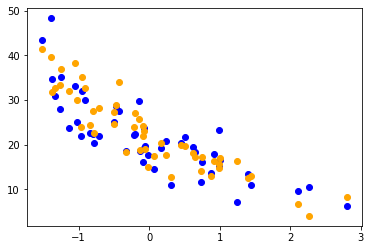

In [122]:
    plt.scatter( X_test[:,12], y_test, color = 'blue' ) 
    
    plt.scatter( X_test[:,12], predicted, color = 'orange' ) 

    plt.show() 

# Comparing with sklearn model

In [100]:
# Importing the libraries

from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error,r2_score

In [101]:
lasso_model=Lasso(max_iter=1000,alpha=1)

In [102]:
# Training the model
lasso_model.fit(X_train,y_train)

Lasso(alpha=1)

In [103]:
# Making Predictions
lasso_predicted=lasso_model.predict(X_test)

In [104]:
# Checking the mean squared error
mean_squared_error(y_test,lasso_predicted)

17.065844376915425

In [105]:
# Checking the r2 value
r2_score(y_test,lasso_predicted)

0.7411938850077054

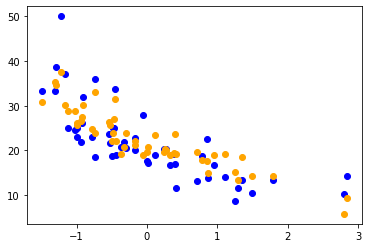

In [108]:
    plt.scatter( X_test[:,12], y_test, color = 'blue' ) 
    
    plt.scatter( X_test[:,12], lasso_predicted, color = 'orange' ) 
    
    plt.show() 